# Trending UK Youtube Video Analysis 

We are going to find out the group the common factors of a youtube video and predict the chances of it becoming trending (use ml here)

### Key Analysis points

#### Factors to consider

- How many views for the trending videos have. Do most of them have a large number of views and is having a large number of views required for a video to become trending. Does the same concept apply to likes, comments? 
- Do views, likes, dislikes, comment count, title length and other factors all relate to each other and how do they all link?

## Import Packages

Here we import some packages that are going to help us analyze data. 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime 
import json 

### Reading the dataset

In [2]:
df = pd.read_csv("/Users/Alex/Youtube Dataset/GBvideos.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
cols_with_missing_values = [col for col in df.columns
                    if df[col].isnull().any()]

print(cols_with_missing_values)

From here we can see that there 38,916 entries in this dataset. All the columns have no null values apart from the description column (This has some null values since ot only has 38304 non-null values instead of 38,916) 

### Data Cleaning

As the description column has some null values. Here we view the rows whose description values are null (null values are denoted by NaN)

In [ ]:
df[pd.isnull(df.description)].head()

Now we need to some data cleaning and get rid off the null values, we can replace the null values with an empty string in the description column. 

In [3]:
df["description"] = df["description"].fillna(value="")

## Dataset Collection Years 

In [ ]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

In [ ]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

We notice that there were more trending videos during 2018 compared to 2017. Since we didn't have a specific column for the year of the trending video, I had to make a few adjustments to get the year of the trending rather than just the date. 

## Stats of numerical columns 

Here we look at the statistical information about the numerical columns of the dataset

In [ ]:
df.describe()

## Views Histogram

In [ ]:
fig = sns.distplot(df["views"], kde=False, bins=np.linspace(0,2.3e8, 47))
plt.xlabel("Views")
plt.ylabel("Number of videos")
plt.show(fig)

Looking at the histogram, most of the trending videos have 5 million views or less. ( 0.1x10^8/2 = 5x10^6) 

In [ ]:
fig = sns.distplot(df[df["views"] < 5000000]["views"], kde=False) 
plt.xlabel("Likes")
plt.ylabel("Number of Videos")
plt.show(fig)

Here we can see that the majority of videos have 1 million views or less. We will look at the percentage of videos less than 1 million views. 

In [ ]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100 

In [ ]:
df[df['views'] < 2e6]['views'].count() / df['views'].count() * 100

In [ ]:
df[df['views'] < 3e6]['views'].count() / df['views'].count() * 100

So around 50% of videos have less than 1 million views, around 64% of videos have less than 2 million views and around 71% of videos have less than 3 million views. 

## Likes Histogram

Here we plot the histogram for the likes column

In [ ]:
fig = sns.distplot(df["likes"], kde=False) 
plt.xlabel("Likes")
plt.ylabel("Number of videos")
plt.show(fig)

Looking at the histogram, most of the trending videos have between 0 to 200,000 likes. We will plot a histogram between 0 to 100,000 likes. 

In [ ]:
fig = sns.distplot(df[df["likes"] < 100000]["likes"], kde=False) 
plt.xlabel("Likes")
plt.ylabel("Number of Videos")
plt.show(fig)

From this histogram, most of the trending videos have approximately 30,000/40,000 or less likes with the peak being videos with around 2000 likes or less. Now, we will calculate the percentage of videos with less than 30,000/40,000 likes

In [ ]:
df[df['likes'] < 30000]['likes'].count() / df['likes'].count() * 100

In [ ]:
df[df['likes'] < 40000]['likes'].count() / df['likes'].count() * 100

So here the percentage of videos with less than 30,000 likes is around 53% and the percentage of videos with less than 40,000 likes is around 58%

## Dislikes Histogram

In [ ]:
fig = sns.distplot(df["dislikes"], kde=False, bins=np.linspace(0,500000)) 
plt.xlabel("Disikes")
plt.ylabel("Number of videos")
plt.show(fig)

In [ ]:
fig = sns.distplot(df[df["dislikes"] < 10000]["dislikes"], kde=False) 
plt.xlabel("Dislikes")
plt.ylabel("Number of Videos")
plt.show(fig)

In [ ]:
df[df['dislikes'] < 2000]['dislikes'].count() / df['dislikes'].count() * 100

In [ ]:
df[df['dislikes'] < 1000]['dislikes'].count() / df['dislikes'].count() * 100

So here the percentage of videos with less than 2000 dislikes is around 66% and the percentage of videos with less than 40,000 likes is around 53%. 

## Comment count histogram

In [ ]:
fig = sns.distplot(df["comment_count"], kde=False, bins=np.linspace(0, 400000))
plt.xlabel("Comment Count")
plt.ylabel("Number of videos")
plt.show(fig)

In [ ]:
fig = sns.distplot(df[df["comment_count"] < 50000]["comment_count"], kde=False)
plt.xlabel("Comment Count") 
plt.ylabel("Number of videos")
plt.show(fig)

In [ ]:
df[df["comment_count"] < 20000]["comment_count"].count() / df["comment_count"].count() * 100

In [ ]:
df[df["comment_count"] < 10000]["comment_count"].count() / df["comment_count"].count() * 100

So here the percentage of videos with less than 20,000 comments is around 86% and the percentage of videos with less than 10,000 likes is around 76%. 

## Calculating the Correlation between attributes

### 1st Chart: Likes & Views

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
graph = sns.regplot(x=df['likes'], y=df['views'], data=df, ax=ax) 
graph.set_title('Correlation of Likes and Views')
sns.despine()

Looking at the graph, the correlation of the graph is positive, so generally, as the views increases, so do the likes. However, the majority of trending videos have likes under 1 million

### 2nd Chart: Likes & Comment Count

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
graph1 = sns.regplot(x=df['likes'], y=df['comment_count'], data=df, ax=ax) 
graph1.set_title('Correlation of Likes and Comment count')
sns.despine()

Looking at the graph, the correlation of the graph is positive, so generally, as the views increases, so does the comment count.

### 3rd Chart: Dislikes & Comment Count

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
graph2 = sns.regplot(x=df['dislikes'], y=df['comment_count'], data=df, ax=ax) 
graph2.set_title('Correlation of Disikes and Comment count')
sns.despine()

Looking at the graph, the correlation of the graph is positive, so as the comment count increases, so does the dislikes count. However, there is only a small minority of videos that have dislikes above 250000. 

### 4th Chart: Likes & Dislikes

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
graph3 = sns.regplot(x=df['likes'], y=df['dislikes'], data=df, ax=ax) 
graph3.set_title('Correlation of Likes and dislikes')
sns.despine()

Looking at the graph, the correlation of the graph is positive, so as the likes increases, so does the dislikes count. However, the likes count of a video is most likely to be much higher than its dislikes count.

## Predicting the amount of likes for a video

Here we are going to create a Logistic Regression Model. First we will try and pick out the most useful parameters to predict how many likes a video will get. So the parameters I will be picking are the comments, views, dislikes and category_id

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.describe()

In [4]:
x = df[["comment_count","views","dislikes","category_id"]]
y = df["likes"]
y1 = df[["likes"]]

But just before we fit the model, I want to look at the distribution of the parameter. 

In [ ]:
f, ax = plt.subplots(2,2, figsize=(20,15))

g = sns.distplot(df['likes'],ax=ax[0][0])

g1 = sns.distplot(df['dislikes'],ax=ax[0][1])

g2 = sns.distplot(df['comment_count'],ax=ax[1][0])

g3 = sns.distplot(df['views'],ax=ax[1][1])

But looking at the data for each parameter, the data is very skewed and unbalanced which can lead to biases during the predictions. So we want to make this balanced.

### Prior Data Cleaning Before Transforming Graphs

As the dislikes, comment counts and likes parameters contain infinite values or negative (we removed the NaN values earlier), we have to replace this before log transforming the values as otherwise, we would run into an error. So we just converted the values to 1. 

In [5]:
replaced = x.replace([np.inf, np.NaN, -1, 0], 1)
replaced1 = y1.replace([np.inf, np.NaN, -1, 0], 1)

In [ ]:
f, ax = plt.subplots(2,2, figsize=(20,15))

df["views_log"] = np.log(df["views"])
g = sns.distplot(df['views_log'],ax=ax[0][0])

g1 =sns.distplot(np.log(replaced.dislikes),ax=ax[0][1])

g2 =sns.distplot(np.log(replaced.comment_count),ax=ax[1][0])

g3 = sns.distplot(np.log(replaced1.likes), ax=ax[1][1])

By log transforming each parameter, we were able to create a bell shaped curve meaning the data is more balanced now. 

### Creating a Linear Regression Model 

Before creating the model, we have to split the data we are testing first into 2 categories: a training set and a test set. I allocated 30% of the data into the test data and 70% to the training set. 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Here we fit the Linear Regression model with the training data

In [50]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model_fit = linreg.fit(X_train, y_train)

In [9]:
print(linreg.intercept_)

56760.64603363651


Here a one unit increase in the predictor variable (likes) is associated with the change of one coefficient per category (comment_count, views, dislikes and category_id)

In [11]:
X_train.columns

Index(['comment_count', 'views', 'dislikes', 'category_id'], dtype='object')

In [12]:
cdf = pd.DataFrame(linreg.coef_, index = X_train.columns,columns=['Coefficients'])

In [13]:
cdf

,Coefficients
comment_count,5.049356
views,0.010759
dislikes,-2.307013
category_id,-2042.361231


Now once we have fit the model, we can apply it to the new data (test data) to make predictions and we will draw a line of best. 

In [14]:
predictions = linreg.predict(X_test)

In [15]:
predictions

array([ 15203.52592684,  97296.58902709,  17075.03887525, ...,
       688403.46612957,  24832.50344381,  49444.36508961])

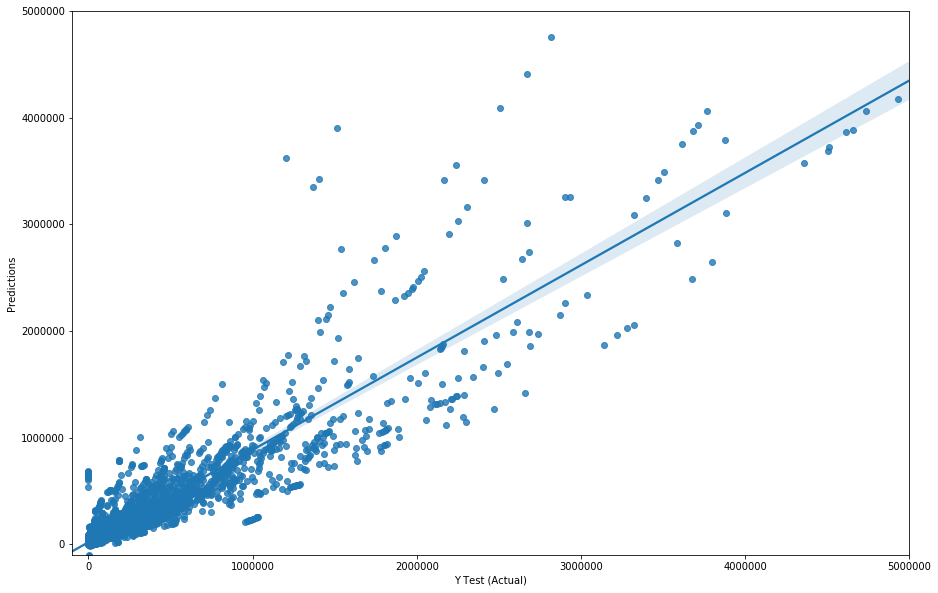

In [17]:
plt.figure(figsize=(15,10))
g = sns.regplot(y_test, predictions, fit_reg=True)
plt.xlabel('Y Test (Actual)')
plt.ylabel('Predictions')
g.set(xlim=(-100000, 5000000),ylim=(-100000, 5000000))
plt.show(g)

residual = observed value - predicted value. 
We will plot the residual values. Positive values for the residuals(y-axis) means the predication was too low and the negative residual values means the prediction was too high

In [18]:
residuals = (y_test - predictions)
print(residuals)

15930    -10100.525927
34211    -24016.589027
16893    -12248.038875
8631     -36359.182303
4580     412285.197256
19266    -36494.988844
31806     84264.982847
25745    -55584.408937
6503     -11305.273371
954      -12044.669686
1210     -21473.528765
34258    456854.037755
14674    -36651.501239
6819      73904.454519
2526      -2949.005112
11609     -9969.951282
3102      -9793.121090
5269     -55424.363580
17349    -31524.501369
32750    -48124.948911
2013      -7158.958914
36063      3658.810136
15805      9327.592704
36854    -35796.356281
33945    -18469.413211
1026      28413.666884
17148    -45602.473120
35722     13078.329580
25781    -24663.834738
10779    -99642.085678
             ...      
33229    -43447.686430
35164     44071.385984
23654      1562.000740
19467     14314.026793
13253     -9698.956343
33410       318.682903
3324       3677.206088
14380    -55069.756951
31819     74846.514159
27631     -7045.371431
9577     -56578.904644
32876    -40554.001806
1618       

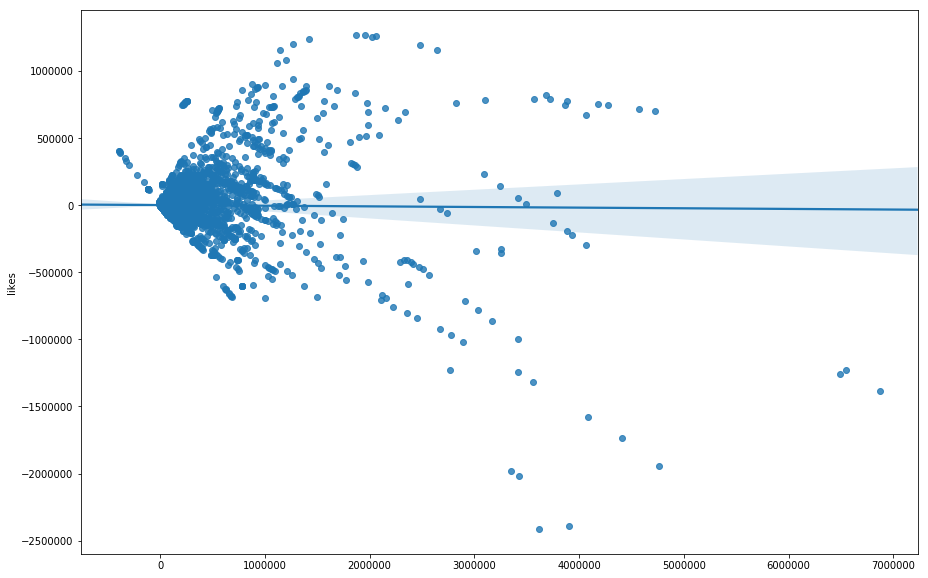

In [19]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y=residuals, fit_reg=True)

Here we are going to calculate r^2 value. This value indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. So for our model, the % of views that are dependent on the features "X" ( likes, views, comment_count) with the scale being from 0-100%. 

A higher r^2 value means that there are smaller differences between the observed data and the fitted values (Generally, not always true though)

In [20]:
from sklearn import metrics 

In [21]:
linreg.score(X_test, y_test)

0.8618632835806791

In [22]:
print('MAE :', metrics.mean_absolute_error(y_test,predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 53471.03022204708
MSE : 17045126524.816933
RMSE : 130556.98573732826
